In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import matplotlib

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'

In [3]:
my_data = pd.read_csv(path, delimiter=',')
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
my_data.shape

(200, 6)

In [5]:
# Preprocessing
# Remove the column since it doesn't contain numeric values
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [6]:
# We need to convert string features to numerical values using pandas.get_dummies()
from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [7]:
y = my_data['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [8]:
# Setting up the decision tree
from sklearn.model_selection import train_test_split
# Let's split the dataset. X and Y are the arrays, test_size represents the ratio of the testing dataset, random_state 
# ensures that we obtain the same splits
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X,y,test_size=0.3,random_state=3)

In [13]:
# Let's see the shape of training, testing set
print('Shaple of X training set {0}'.format(X_trainset.shape),'&', 'Size of Y training set {0}'.format(y_trainset.shape))

Shaple of X training set (140, 5) & Size of Y training set (140,)


In [14]:
print('Shaple of X testing set {0}'.format(X_testset.shape),'&', 'Size of Y testing set {0}'.format(y_testset.shape))

Shaple of X testing set (60, 5) & Size of Y testing set (60,)


In [15]:
# Modeling stage
# let's create an instance of the DecisionTreeClassifier called drugTree
# We will specify criterion='entropy' so we can see the information gain of each node
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [16]:
# fit the data
drugTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [17]:
# Prediction stage
# we will make some predictions on the testing dataset and store it into predTree
predTree = drugTree.predict(X_testset)

In [18]:
# compare the prediction and actual values
print(predTree[0:5], y_testset[0:5], sep='\n')

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [19]:
# Evaluation stage
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTree's Accuracy:  0.9833333333333333


In [23]:
# Let's visualize it
!pip install --upgrade pip
!pip install pydotplus
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 22.1.2
    Uninstalling pip-22.1.2:
      Successfully uninstalled pip-22.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.3 MB/s eta 0:00:00


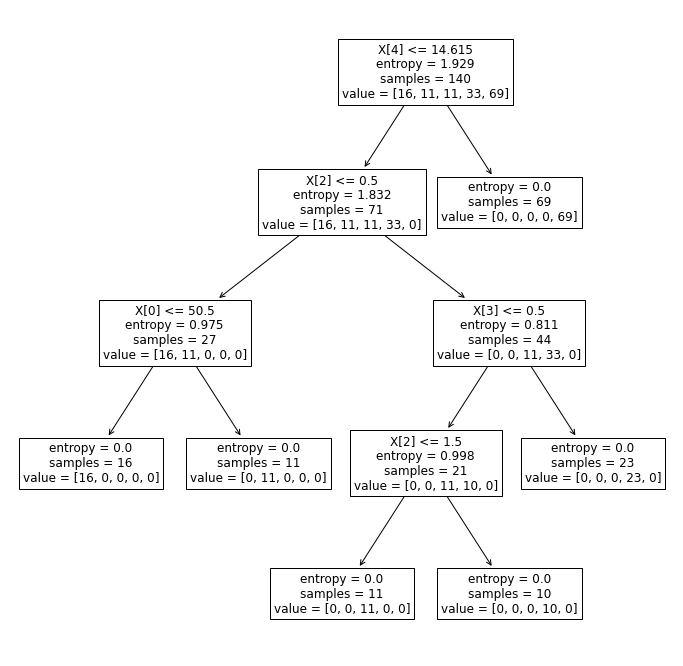

In [30]:
from sklearn.datasets import load_iris

plt.figure(figsize = (12,12))
tree.plot_tree(drugTree, fontsize=12)
plt.show()